In [1]:
# IMPORTS

# standard python
import os

# science stuff
import numpy as np
import scipy
from scipy.optimize import fsolve
import sympy
from sympy import *
init_printing(use_latex=True)
from copy import deepcopy

# inhouse functions for this example
from functions import *

# image viewing
from IPython.core.display import HTML

# plotting
import matplotlib.pyplot as plt
# optional for 3D plotting
import pylab
from mpl_toolkits.mplot3d import Axes3D

# settings
%pylab inline
matplotlib.rcParams.update({'font.size': 12})

from matplotlib import rc
rc('text', usetex=True)

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (12, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


## The System: tripeptide of alanine

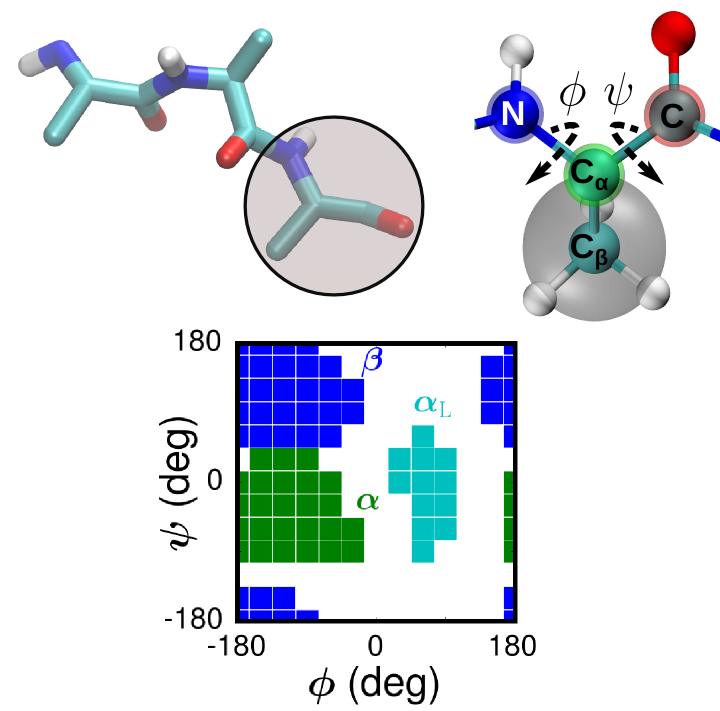

In [2]:
from IPython.display import Image
from IPython.display import display
x = Image(filename='ALA3_intro.png',width=450)
display(x)

## The Problem: determine the total kinetics of the peptide from a 2-residue model

&nbsp;

[comment]: <> ( inserting image in markdown: <img src="ALA3_intro.png" width="200px"> )

$$\huge \bullet-\bullet-\bullet$$  
$$\large x_0 \hspace{11mm} x_1 \hspace{11mm} x_2 $$             

&nbsp;

$$x_i \in \{ \alpha, \beta \} \equiv \{ 0, 1 \}$$  

&nbsp;

* Suppose we know the average dynamic behavior of pairs of residues, i.e., $$P^{i,j}_{x'_ix'_j|x_ix_j} - \text{ Probability of } \{ x'_ix'_j \} \text{ at time } t+\tau \text{ given } \{ x_ix_j \} \text{ at time } t \text{ at positions i and j } $$

&nbsp;

* We want to build a kinetic model for the entire tri-peptide, i.e., $$P_{x'_0x'_1x'_2|x_0x_1x_2} - \text{ Probability of } \{ x'_0x'_1x'_2 \} \text{ at time } t+\tau \text{ given } \{ x_0x_1x_2 \} \text{ at time } t $$ 

### Other Players

$$P^{i,j}_{x_ix_j} - \text{ Probability of } \{ x_ix_j \} \text{ at positions i and j } $$

$$P^{i}_{x'_i|x_i} - \text{ Probability of } \{ x'_i \} \text{ at time } t+\tau \text{ given } \{ x_i \} \text{ at time } t \text{ at position i } $$

$$P^{i}_{x_i} - \text{ Probability of } \{ x_i \} \text{ at position i } $$

### The solution summary

$$P_{x'_0x'_1x'_2|x_0x_1x_2}=\frac{P^{0,1}_{x'_0x'_1|x_0x_1} P^{1,2}_{x'_1x'_2|x_1x_2}}{P^{1}_{x'_1|x_1}}$$

&nbsp;

$$P^{1}_{x'_1|x_1} = \frac{1}{P^{1}_{x_1}} \left( \sum_{y'_0y_0y'_2y_2} P^{0,1}_{y_0x_1} P^{0,1}_{y'_0x'_1|y_0x_1} P^{1,2}_{x_1y_2} P^{1,2}_{x'_1y'_2|x_1y_2} \right)^{0.5}$$

&nbsp;

$$P^{1}_{0|0} = \frac{1}{P^{1}_{0}} \left(1.0 P^{0,1}_{00} P^{0,1}_{00|00} P^{1,2}_{00} P^{1,2}_{00|00} + 1.0 P^{0,1}_{00} P^{0,1}_{00|00} P^{1,2}_{00} P^{1,2}_{01|00} + 1.0 P^{0,1}_{00} P^{0,1}_{00|00} P^{1,2}_{00|01} P^{1,2}_{01} + 1.0 P^{0,1}_{00} P^{0,1}_{00|00} P^{1,2}_{01} P^{1,2}_{01|01} + 1.0 P^{0,1}_{00} P^{0,1}_{10|00} P^{1,2}_{00} P^{1,2}_{00|00} + 1.0 P^{0,1}_{00} P^{0,1}_{10|00} P^{1,2}_{00} P^{1,2}_{01|00} + 1.0 P^{0,1}_{00} P^{0,1}_{10|00} P^{1,2}_{00|01} P^{1,2}_{01} + 1.0 P^{0,1}_{00} P^{0,1}_{10|00} P^{1,2}_{01} P^{1,2}_{01|01} + 1.0 P^{0,1}_{00|10} P^{0,1}_{10} P^{1,2}_{00} P^{1,2}_{00|00} + 1.0 P^{0,1}_{00|10} P^{0,1}_{10} P^{1,2}_{00} P^{1,2}_{01|00} + 1.0 P^{0,1}_{00|10} P^{0,1}_{10} P^{1,2}_{00|01} P^{1,2}_{01} + 1.0 P^{0,1}_{00|10} P^{0,1}_{10} P^{1,2}_{01} P^{1,2}_{01|01} + 1.0 P^{0,1}_{10} P^{0,1}_{10|10} P^{1,2}_{00} P^{1,2}_{00|00} + 1.0 P^{0,1}_{10} P^{0,1}_{10|10} P^{1,2}_{00} P^{1,2}_{01|00} + 1.0 P^{0,1}_{10} P^{0,1}_{10|10} P^{1,2}_{00|01} P^{1,2}_{01} + 1.0 P^{0,1}_{10} P^{0,1}_{10|10} P^{1,2}_{01} P^{1,2}_{01|01}\right)^{0.5}$$

## Sympy Basics

* Defining Symbols

In [3]:
x = Symbol('x')
y,z = symbols('y,z')

* Expressions

In [4]:
eqn = z*sympy.exp(-x**2-y**2) + x**2*y**2*sympy.exp(-2*(x**2+y**2))
eqn

x**2*y**2*exp(-2*x**2 - 2*y**2) + z*exp(-x**2 - y**2)

In [5]:
expand(eqn)

x**2*y**2*exp(-2*x**2)*exp(-2*y**2) + z*exp(-x**2)*exp(-y**2)

In [6]:
simplify(eqn)

x**2*y**2*exp(-2*x**2 - 2*y**2) + z*exp(-x**2 - y**2)

In [7]:
eqn+eqn

2*x**2*y**2*exp(-2*x**2 - 2*y**2) + 2*z*exp(-x**2 - y**2)

In [8]:
eqn**2

(x**2*y**2*exp(-2*x**2 - 2*y**2) + z*exp(-x**2 - y**2))**2

In [9]:
expand(eqn**2)

x**4*y**4*exp(-4*x**2)*exp(-4*y**2) + 2*x**2*y**2*z*exp(-3*x**2)*exp(-3*y**2) + z**2*exp(-2*x**2)*exp(-2*y**2)

* Printing

In [10]:
# to code
print ccode(eqn)
print ''
print python(eqn)

pow(x, 2)*pow(y, 2)*exp(-2*pow(x, 2) - 2*pow(y, 2)) + z*exp(-pow(x, 2) - pow(y, 2))

x = Symbol('x')
y = Symbol('y')
z = Symbol('z')
e = x**2*y**2*exp(-2*x**2 - 2*y**2) + z*exp(-x**2 - y**2)


In [11]:
# to latex
print latex(eqn)+' = 0'

x^{2} y^{2} e^{- 2 x^{2} - 2 y^{2}} + z e^{- x^{2} - y^{2}} = 0


$$x^{2} y^{2} e^{- 2 x^{2} - 2 y^{2}} + z e^{- x^{2} - y^{2}} = 0$$

* Basic equation solving

In [12]:
z_eqn = sympy.solve(eqn,[z])

#print z_eqn

z_eqn = z_eqn[0]

eqn_label = 'z = '+latex(z_eqn)
print eqn_label

z = - x^{2} y^{2} e^{- x^{2} - y^{2}}


$$z = - x^{2} y^{2} e^{- x^{2} - y^{2}}$$

* Substitutions

In [13]:
vals = [-1.,2.]

var = [x,y]

sub_dic = {el: vals[i] for i,el in enumerate(var)}
#print sub_dic

z_eqn.subs(sub_dic)

-0.0269517879963419

In [14]:
x_vals = np.linspace(-1,1,100).tolist() # get a range of input values
y_vals = np.linspace(-1,1,100).tolist()

#print x_vals

vals = [[xv,yv] for xv in x_vals for yv in y_vals] # enumerate all combinations of x_vals and y_vals
vals = np.array(vals)

#print vals.shape
#print vals
#print vals[0]

var = [x,y] # all possible input values
f = lambdify(var, z_eqn, "numpy") # convert the Sympy expression to a lambda-function for inputing values

#print f(*vals[0])

z_vals = [f(*inp) for inp in vals] # calculate z for each set of input values

#np.array(z_vals).shape
#z_vals[:10]

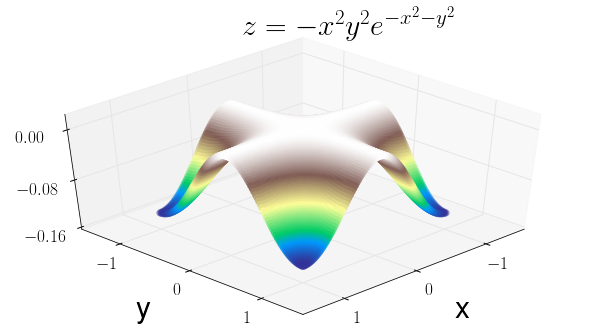

In [15]:
# Let's plot the calculated z values

fig = pylab.figure(figsize=(8, 4))
ax = Axes3D(fig)
p = ax.scatter(vals[:,0], vals[:,1], z_vals, c=z_vals, cmap='terrain', edgecolors='none', s=50 )

ax.set_xlabel('x', fontsize=30, labelpad=25)
ax.set_ylabel('y', fontsize=30, labelpad=25)

# nb - I can use my expression here as the graph label
ax.text2D(0.41, 1.0, r'$'+eqn_label+'$', transform=ax.transAxes, fontsize=30) 

ax.set_xticks([-1.,0,1.])
ax.set_yticks([-1.,0,1.])
ax.set_zticks([-0.16,-0.08,0.])

ax.tick_params(axis='x', which='major', pad=5, size=20)
ax.tick_params(axis='y', which='major', pad=5, size=20)
ax.tick_params(axis='z', which='major', pad=10, size=20)

ax.azim = 45
ax.elev = 45

## Back to the peptide problem

* basic input for our problem

In [ ]:
Nres = 3 # number of residues
Ncorr = 1 # == k; number of correlations treated in the approximation

* some specific coding stuff

In [ ]:
T_basenm = 'T2res'
flag_seqdep = False
end_state = 1 # must be 1 or 0, but doesn't play a roll, just for book keeping purposes

* get all the possible states for the full system, sets of pairs, and single residues

In [ ]:
states_Nres = get_poss_states( Nres )
states_Nres = np.array(states_Nres) # my code expects a numpy array
states_Nres

In [ ]:
states_kp1res = np.array(get_poss_states( Ncorr+1 ))
states_kp1res

In [ ]:
states_kres = np.array(get_poss_states( Ncorr ))
states_kres

* define symbols for each of the Nres variables, such that they are latex-compatible 

In [ ]:
seq1 = '010'
seq2 = '000'
test = Symbol('P'+'_'+seq2+'|'+seq1, nonnegative=True) # prob always pos!
print test
print latex(test)

$$P_{000|010}$$

In [ ]:
# generate them all at once
PN = []
for s1 in range(len(states_Nres)):
    PN.append([])
    seq1 = ''.join(str(s) for s in states_Nres[s1])
    for s2 in range(len(states_Nres)):
        seq2 = ''.join(str(s) for s in states_Nres[s2])
        PN[s1].append(Symbol('P_'+seq2+'|'+seq1, nonnegative=True))

In [ ]:
print PN
print ''
print PN[0]
print ''
print PN[0][0]

In [ ]:
# nb - defining matrices, can do matrix math with these
M = sympy.Matrix(3, 2, lambda i,j:sympy.var('M_%d%d' % (i+1,j+1)))
print M
print latex(M)

$$\left[\begin{matrix}M_{11} & M_{12}\\M_{21} & M_{22}\\M_{31} & M_{32}\end{matrix}\right]$$

In [ ]:
# nb - for matplotlib syntax, leave out print
latex(M)

* define the rest of the variables, just as before

In [ ]:
Pkp1res = define_Pkp1res(states_kp1res, Nres, Ncorr)
Pkp1res_end = define_Pkp1res_end(states_kp1res, Nres, Ncorr)
Pkp1res_stat = define_Pkp1res_stat(states_kp1res, Nres, Ncorr)
Pkp1res_stat_end = define_Pkp1res_stat_end(states_kp1res, Nres, Ncorr)
Pkres = define_Pkres(states_kres, Nres, Ncorr)
Pkres_end = define_Pkres_end(states_kres, Nres, Ncorr)
Pkres_stat = define_Pkres_stat(states_kres, Nres, Ncorr)
Pkres_stat_end = define_Pkres_stat_end(states_kres, Nres, Ncorr)

In [ ]:
print latex(Pkp1res[0][0][0])
print latex(Pkp1res_end[0][0][0])
print latex(Pkp1res_stat[0][0])
print latex(Pkp1res_stat_end[0][0])
print latex(Pkres[0][0][0])
print latex(Pkres_end[-1][0][0])
print latex(Pkres_stat[0][0])
print latex(Pkres_stat_end[0][0])

$$P^{0,1}_{00|00}$$

$$P^{b0,0}_{00|00}$$

$$P^{0,1}_{00}$$

$$P^{b0,0}_{00}$$

$$P^{0}_{0|0}$$

$$P^{e0}_{0|0}$$

$$P^{0}_{0}$$

$$P^{b0}_{0}$$

### We need dummy variables at the ends for boundary conditions

&nbsp;

$$\huge \bullet-\bullet-\bullet-\bullet-\bullet$$  
$$\large b_0 \hspace{11mm} x_0 \hspace{11mm} x_1 \hspace{11mm} x_2 \hspace{11mm} e_0 $$             


* now, let's put together the equations for each global prob           


In [ ]:
eqns_PN = []
for s in range(len(states_Nres)):
    for sp in range(len(states_Nres)):
        tmp = 1.
        for res in range(Nres-Ncorr):
            statep = states_Nres[sp][res:res+Ncorr+1]
            indp = np.where( np.all(states_kp1res==np.array(statep),axis=1) == True )[0][0]
            state = states_Nres[s][res:res+Ncorr+1]
            ind = np.where( np.all(states_kp1res==np.array(state),axis=1) == True )[0][0]
            tmp *= Pkp1res[res][ind][indp]
        for res in range(Nres-Ncorr-1):
            statep = states_Nres[sp][res+1:res+1+Ncorr]
            indp = np.where( np.all(states_kres==np.array(statep),axis=1) == True )[0][0]
            state = states_Nres[s][res+1:res+1+Ncorr]
            ind = np.where( np.all(states_kres==np.array(state),axis=1) == True )[0][0]
            tmp /= Pkres[res+1][ind][indp]
        tmp *= -1
        tmp += PN[s][sp]
        eqns_PN.append(tmp)

In [ ]:
eqns_PN[0]

In [ ]:
print latex(eqns_PN[0])

$$- \frac{1.0 P^{0,1}_{00|00}}{P^{1}_{0|0}} P^{1,2}_{00|00} + P_{000|000}$$

* we can solve this equation using Sympy for a nicer latex display

In [ ]:
soln_dic = sympy.solve([eqns_PN[0]],np.concatenate(PN).tolist())
#print soln_dic

In [ ]:
print latex(PN[0][0])+'='+latex(soln_dic[PN[0][0]])

$$P_{000|000}=\frac{P^{0,1}_{00|00} P^{1,2}_{00|00}}{P^{1}_{0|0}}$$

* generate normalization conditions for PN

In [ ]:
eqns_norm_PN = []
for s1 in range(len(states_Nres)):
    eqns_norm_PN.append( np.sum(PN,axis=1)[s1] - 1 )

In [ ]:
print latex(eqns_norm_PN[0])+' = 0'

$$P_{000|000} + P_{001|000} + P_{010|000} + P_{011|000} + P_{100|000} + P_{101|000} + P_{110|000} + P_{111|000} - 1 = 0$$


* generate equations for the k-res conditional probabilties

In [ ]:
eqns_Pkres = get_eqns_Pkres(states_kp1res, states_kres, Nres, Ncorr, Pkp1res, Pkp1res_end, Pkp1res_stat, Pkp1res_stat_end, Pkres, Pkres_end, Pkres_stat, Pkres_stat_end, end_state)

In [ ]:
print latex(eqns_Pkres[0])+' = 0'

$$P^{0}_{0|0} - \frac{1}{P^{0}_{0}} \left(1.0 P^{0,1}_{00} P^{0,1}_{00|00} P^{b0,0}_{10} P^{b0,0}_{10|10} + 1.0 P^{0,1}_{00} P^{0,1}_{01|00} P^{b0,0}_{10} P^{b0,0}_{10|10} + 1.0 P^{0,1}_{00|01} P^{0,1}_{01} P^{b0,0}_{10} P^{b0,0}_{10|10} + 1.0 P^{0,1}_{01} P^{0,1}_{01|01} P^{b0,0}_{10} P^{b0,0}_{10|10}\right)^{0.5} = 0$$

* and corresponding normalization conditions...

In [ ]:
eqns_norm_Pkres = []
for res in range(Nres-(Ncorr-1)):
    for s1 in range(len(states_kres)):
        eqn_tmp = 0.
        for s2 in range(len(states_kres)):
            eqn_tmp += Pkres[res][s1][s2]
        eqns_norm_Pkres.append( eqn_tmp - 1 )

In [ ]:
print latex(eqns_norm_Pkres[2])+' = 0'

$$P^{1}_{0|0} + P^{1}_{1|0} - 1 = 0$$

* specify the boundary conditions

In [ ]:
inp_bndry_cond_stat = get_bndry_cond_stat_dict(states_kp1res, states_kres, Nres, Ncorr, Pkp1res_stat_end, Pkres_stat, end_state)
inp_bndry_cond = get_bndry_cond_dict(states_kp1res, states_kres, Nres, Ncorr, Pkp1res_end, Pkres, end_state)
inp_bndry_cond_kres_stat = get_bndry_cond_kres_stat_dict(states_kp1res, states_kres, Nres, Ncorr, Pkres_stat_end, Pkres_stat, end_state)
inp_bndry_cond_kres = get_bndry_cond_kres_dict(states_kp1res, states_kres, Nres, Ncorr, Pkres_end, Pkres_stat, end_state)

print inp_bndry_cond_stat

* let's substitute the boundary conditions into our equations

In [ ]:
eqns_Pkres.subs(inp_bndry_cond) # nb - .subs only works on a single expression!
#eqns_Pkres[0].subs(inp_bndry_cond)

* make a function for substituting into a list of expressions

In [ ]:
def sub_inp( eqns, dic ):
    for eqn in range(len(eqns)):
        eqns[eqn] = eqns[eqn].subs(dic)
    return eqns

* substitute all the boundary conditions

In [ ]:
eqns_Pkres = sub_inp( eqns_Pkres, inp_bndry_cond )
eqns_Pkres = sub_inp( eqns_Pkres, inp_bndry_cond_stat )
eqns_Pkres = sub_inp( eqns_Pkres, inp_bndry_cond_kres )
eqns_Pkres = sub_inp( eqns_Pkres, inp_bndry_cond_kres_stat )

In [ ]:
print latex(eqns_Pkres[0])+' = 0'

$$P^{0}_{0|0} - \frac{1}{P^{0}_{0}} \left(1.0 P^{0,1}_{00} P^{0,1}_{00|00} P^{b0,0}_{10} P^{b0,0}_{10|10} + 1.0 P^{0,1}_{00} P^{0,1}_{01|00} P^{b0,0}_{10} P^{b0,0}_{10|10} + 1.0 P^{0,1}_{00|01} P^{0,1}_{01} P^{b0,0}_{10} P^{b0,0}_{10|10} + 1.0 P^{0,1}_{01} P^{0,1}_{01|01} P^{b0,0}_{10} P^{b0,0}_{10|10}\right)^{0.5} = 0$$

$$P^{0}_{0|0} - \frac{1}{P^{0}_{0}} \left(1.0 P^{0,1}_{00} P^{0,1}_{00|00} P^{0}_{0} P^{0}_{0|0} + 1.0 P^{0,1}_{00} P^{0,1}_{01|00} P^{0}_{0} P^{0}_{0|0} + 1.0 P^{0,1}_{00|01} P^{0,1}_{01} P^{0}_{0} P^{0}_{0|0} + 1.0 P^{0,1}_{01} P^{0,1}_{01|01} P^{0}_{0} P^{0}_{0|0}\right)^{0.5} = 0
$$

* read in the input model

In [ ]:
Pkp1res_inp = []
Nsets = Nres-Ncorr
for group in range(Nsets):
    if ( flag_seqdep ):
        Pkp1res_inp.append(np.load(T_basenm+'_'+str(group)+'.npy'))
    else:
        Pkp1res_inp.append(np.load(T_basenm+'.npy'))

In [ ]:
print Pkp1res_inp[0]
fig = plt.figure(figsize=(7,4))
plt.pcolor(Pkp1res_inp[0],cmap='Blues',vmin=0,vmax=1)
plt.colorbar()

* set up a dictionary for the permanent inputs

In [ ]:
inp_var = {}
# Pkp1res
for res in range(Nres-Ncorr):
    for s1 in range(len(states_kp1res)):
        for s2 in range(len(states_kp1res)):
            var = Pkp1res[res][s1][s2]
            inp_var[var] = Pkp1res_inp[res][s1][s2]
print inp_var

* substitute these values into the equations

In [ ]:
eqns_Pkres = sub_inp( eqns_Pkres, inp_var )

In [ ]:
print latex(eqns_Pkres[0])+' = 0'

$$P^{0}_{0|0} - \frac{1}{P^{0}_{0}} \left(0.745160670467251 P^{0,1}_{00} P^{0}_{0} P^{0}_{0|0} + 0.678819236749774 P^{0,1}_{01} P^{0}_{0} P^{0}_{0|0}\right)^{0.5} = 0$$

In [ ]:
print latex( N(eqns_Pkres[0],2) )+' = 0'

$$P^{0}_{0|0} - \frac{1}{P^{0}_{0}} \left(0.75 P^{0,1}_{00} P^{0}_{0} P^{0}_{0|0} + 0.68 P^{0,1}_{01} P^{0}_{0} P^{0}_{0|0}\right)^{0.5} = 0$$

In [ ]:
print latex( N(simplify(eqns_Pkres[0]),2) )+' = 0'

$$- \frac{(P^{0}_{0|0})^{0.5}}{(P^{0}_{0})^{0.5}} \left(0.75 P^{0,1}_{00} + 0.68 P^{0,1}_{01}\right)^{0.5} + P^{0}_{0|0}$$

*nb - latex printing messed up here, had to add parantheses myself

* approximate the stationary probabilities from the input model (calculated ahead of time)

In [ ]:
mu_eff_kp1res = np.load('mu_eff_kp1res_0.npy')
mu_eff_kres = np.load('mu_eff_kres_0.npy')

In [ ]:
print mu_eff_kres
print mu_eff_kp1res

* make a dictionary of these values for substitution

In [ ]:
# initialize the Pkp1res_stat inputs
inp_tmp = add_Pkp1res_stat_dict_vals( {}, Pkp1res_stat, mu_eff_kp1res, states_kp1res, Nres, Ncorr )
# add the Pkres_stat inputs
for res in range(Nres-(Ncorr-1)):
    for state in range(len(states_kres)):
        var = Pkres_stat[res][state]
        inp_tmp[var] = mu_eff_kres[res][state]
print inp_tmp

* substitute the inputs into the eqns - these are initial estimates...

In [ ]:
eqns = deepcopy(eqns_Pkres) # nb - copying my expressions, so I don't permanently overwrite them
eqns = sub_inp( eqns, inp_tmp )

* solve the equations using Sympy

In [ ]:
Pkres_flat = np.reshape(Pkres,(Nres*states_kres.shape[0]*states_kres.shape[0])).tolist() # flatten the var list
#Pkres_flat = np.concatenate(np.concatenate(Pkres)).tolist()
#Pkres_flat = [item for sublist in Pkres for subsublist in sublist for item in subsublist]
#print Pkres_flat

soln = sympy.solve(eqns, Pkres_flat)
#print soln
soln = soln[0]

In [ ]:
print latex(Pkres_flat[0])+'='+str(N(soln[0],2))

$$P^{0}_{0|0}=0.71$$

* these equations trivial, but we may more generally want to use a more powerful solver from the scipy package

* nb - scipy can't handle all the latex syntax in my symbols, convert to something simpler

In [ ]:
Pkres_alt = [Symbol('Pkres'+str(i)) for i,el in enumerate(Pkres_flat)]
print Pkres_alt

In [ ]:
Pkres_alt_dic = {el: Symbol('Pkres'+str(i)) for i,el in enumerate(Pkres_flat)}
print Pkres_alt_dic

In [ ]:
Pkres_rev_dic = {val: key for (key,val) in Pkres_alt_dic.items()}
print Pkres_rev_dic

In [ ]:
eqns = sub_inp(eqns, Pkres_alt_dic)
print N(eqns[0],2)

* to solve with scipy, we need to transform the expressions into scipy-compatible functions

In [ ]:
def lambdify_vec( eqns, var ): # lambdify a list of expressions
    fncs = [lambdify((var), eqn, modules='numpy') for eqn in eqns]
    return fncs

def gen_fv( fncs ): # generate a function which evaluates the list of lambda functions for given inputs
    return lambda zz: np.array([fnc(*zz) for fnc in fncs]) # nb - think about generating a Jacobian in this way...

def init_soln( N ): # generate an initial solution of a given size
    return 0.5*np.ones(N)

* now we are ready to solve

In [ ]:
var_live = Pkres_alt
fncs = lambdify_vec( eqns, var_live )
f_v = gen_fv( fncs )
zz0 = init_soln(len(var_live))
Pkres_soln = fsolve(f_v, zz0)

In [ ]:
Pkres_soln

* check accuracy of the normalization 

In [ ]:
eqns_norm_Pkres = sub_inp(eqns_norm_Pkres, Pkres_alt_dic)
sumsq_Pkres_norm = []
soln_var = {}
for var in range(len(var_live)):
    soln_var[var_live[var]] = Pkres_soln[var]
sumsq_Pkres_norm.append(sumsq_eqns(eqns_norm_Pkres,soln_var))

In [ ]:
sumsq_Pkres_norm

* same thing for the N-res probabilities

* first, swap out scipy-compatible variables

In [ ]:
PN_flat = np.reshape(PN,(states_Nres.shape[0]*states_Nres.shape[0]))
PN_alt = [Symbol('PN'+str(i)) for i,el in enumerate(PN_flat)]
PN_alt_dic = {el: Symbol('PN'+str(i)) for i,el in enumerate(PN_flat)}

* substitute all possible inputs

In [ ]:
tot_var = dict(inp_tmp.items()+soln_var.items()+inp_var.items())
eqns = deepcopy(eqns_PN)
eqns = sub_inp( eqns, Pkres_alt_dic)
eqns = sub_inp( eqns, tot_var )
eqns = sub_inp( eqns, PN_alt_dic)

* solve the N-res equations with scipy

In [ ]:
var_live = PN_alt
fncs = lambdify_vec( eqns, var_live )
f_v = gen_fv( fncs )
zz0 = init_soln(len(var_live))
PN_soln = fsolve(f_v, zz0)

In [ ]:
PN_soln

* check accuracy of the normalization

In [ ]:
eqns_norm_PN = sub_inp(eqns_norm_PN, PN_alt_dic)
soln_var = {}
sumsq_PN_norm = []
for var in range(len(var_live)):
    soln_var[var_live[var]] = PN_soln[var]
sumsq_PN_norm.append(sumsq_eqns(eqns_norm_PN,soln_var))

In [ ]:
sumsq_PN_norm

* the model is surprisingly consitent without iterating => the residue dynamics are largely uncoupled

####     You can now set up and solve equations with Sympy!
## The End